In [2]:
import numpy as np

def calculate_newton_base(x_bar, x):
    return np.prod([x_bar - x_i for x_i in x])

def forward_substitution(L, y):
    n = len(y)
    b = np.zeros(n)
    b[0] = y[0] / L[0][0]
    for k in range(0, n-1):
        for i in range(k+1, n):
            y[i] = y[i] - L[i][k] * b[k]
        b[k+1] = y[k+1] / L[k+1][k+1]
    return b.tolist()

def newton_interpolation(x, y):
    n = len(x)
    L = np.zeros((n,n))
    
    L[:,0] = 1
    for i in range(1,n):
        for j in range(1, i+1):
            L[i][j] = calculate_newton_base(x[i], x[:j])
            
    return forward_substitution(L, y)

def newton_evalutation(b, x, x_bar):
    p = b[-1]
    for k in range(len(b)-2, -1, -1):
        p = b[k] + (x_bar - x[k]) * p
    return p


def calculate_di(x, i):
    return 1/np.prod([x[i] - x[j] for j in range(len(x)) if j != i])

def lagrange_evaluation(x, y, x_bar):
    n = len(x)
    d = [calculate_di(x, i) for i in range(n)]
    
    num = 0
    den = 0
    for i in range(n):
        if x_bar - x[i] == 0:
            return y[i]
        div = d[i] / (x_bar - x[i])
        num += y[i] * div
        den += div
    return num/den

In [3]:
import unittest

class TestInterpolation(unittest.TestCase):
    def test_newton_interpolation(self):
        self.assertEqual(newton_interpolation([0,1,2],[0,1,0]), [0,1,-1])
        self.assertEqual(newton_interpolation([0,2,1],[0,0,1]), [0,0,-1])
        
    def test_newton_evalutation(self):
        b =[0,1,-1]
        self.assertEqual(newton_evalutation(b,[0,1,2],0), 0)
        self.assertEqual(newton_evalutation(b,[0,1,2],1), 1)
        self.assertEqual(newton_evalutation(b,[0,1,2],2), 0)
        self.assertEqual(newton_evalutation(b,[0,1,2],1.5), 0.75)
    
    def test_lagrange_evaluation(self):
        self.assertEqual(lagrange_evaluation([0,1,2],[0,1,0],1.5),0.7499999999999999)

def run_tests(test_class):
    suite = unittest.TestLoader().loadTestsFromTestCase(test_class)
    unittest.TextTestRunner(verbosity=2).run(suite)
    
run_tests(TestInterpolation)

test_lagrange_evaluation (__main__.TestInterpolation.test_lagrange_evaluation) ... ok
test_newton_evalutation (__main__.TestInterpolation.test_newton_evalutation) ... ok
test_newton_interpolation (__main__.TestInterpolation.test_newton_interpolation) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.004s

OK


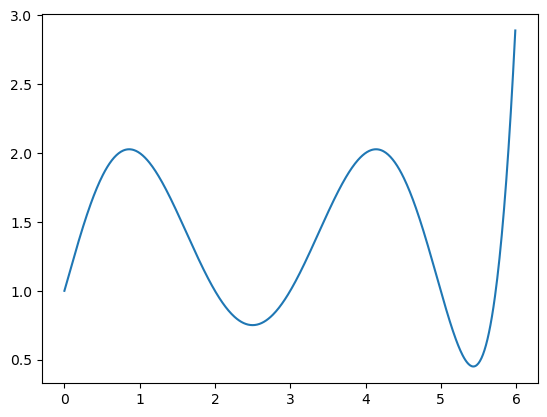

In [4]:
import matplotlib.pyplot as plt

class NewtonPolynomial:
    def __init__(self, x, y):
        self.x = x
        self.b = newton_interpolation(x, y)

    def evaluate(self, x):
        p = self.b[-1]
        for k in range(len(self.b) - 2, -1, -1):
            p = self.b[k] + (x - self.x[k]) * p
        return p

x = [0,1,2,3,4,5,6]
y = [1,2,1,1,2,1,3]
polynomial = NewtonPolynomial(x, y)
 
values = np.arange(0, 6, 0.01)
plt.plot(values, polynomial.evaluate(values))
plt.show()

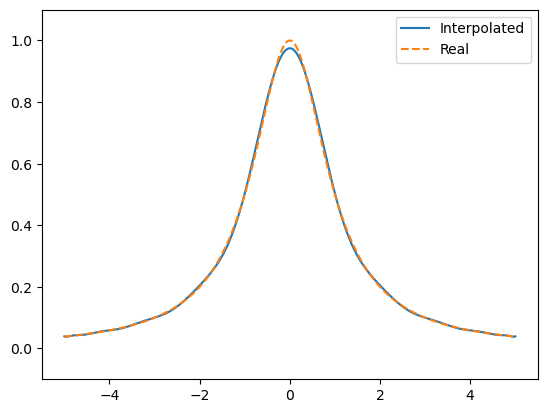

In [5]:
def runge_function(x):
    return 1 / (1 + x**2)

def chebyshev_points(n, a, b):
    i = np.arange(0, n + 1)
    x = np.cos((2 * i + 1) * np.pi / (2 * (n + 1)))  # Punti di Chebyshev in [-1, 1]
    x_mapped = ((b - a) * (x + 1)) / 2 + a       # Mappatura degli zeri in [a, b]
    return x_mapped

n_points = 21
# x_points = [10*i / n_points - 5 for i in range(n_points)] # Punti equispaziati
x_points = chebyshev_points(n_points,-5,5)
y_points = [runge_function(x) for x in x_points]

x_values = np.linspace(-5, 5, 1000)
y_interpolated = [lagrange_evaluation(x_points, y_points, x_val) for x_val in x_values]
y_real = [runge_function(x) for x in x_values]

plt.plot(x_values, y_interpolated, label="Interpolated")
plt.plot(x_values, y_real, linestyle='--', label="Real")
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()

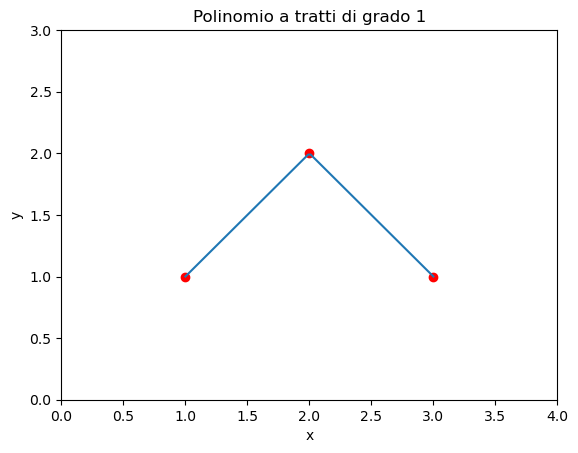

In [54]:
points = [(1,1), (2,2), (3,1)]

def piecewise_linear(points, x):
    for i in range(len(points) - 1):
        x1, y1 = points[i]
        x2, y2 = points[i + 1]
        if x1 == x2:
            continue
        if x1 <= x <= x2:
            slope = (y2 - y1) / (x2 - x1)
            y = y1 + slope * (x - x1)
            return y
    return None 

xv = np.linspace(1, 3, 100)
yv = [piecewise_linear(points, x) for x in xv]

plt.scatter(*zip(*points), color='red')
plt.plot(xv, yv)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,4)
plt.ylim(0,3)
plt.title('Polinomio a tratti di grado 1')
plt.show()